In [13]:

%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [14]:
cast = pd.read_csv('/content/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015.0,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985.0,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017.0,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015.0,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015.0,$hutter,actor,1988 Opera House Patron,NaN


In [16]:
titles = pd.read_csv('/content/titles.csv')
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [ ]:
release_dates = pd.read_csv('/content/release_dates.csv')
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [ ]:
both = cast[(cast.character=='Superman') | (cast.character == 'Batman')].groupby(['year','character']).size().unstack().fillna(0)
diff = both.Superman - both.Batman
print("Superman: " + str(len(diff[diff>0])))

Superman: 7


How many years have been "Batman years", with more Batman characters than Superman characters?

In [ ]:
both = cast[(cast.character=='Superman') | (cast.character == 'Batman')].groupby(['year','character']).size().unstack().fillna(0)
diff = both.Batman - both.Superman
print("Batman: " + str(len(diff[diff>0])))

Batman: 10


Plot the number of actor roles each year and the number of actress roles each year over the history of film.

<Axes: xlabel='year'>

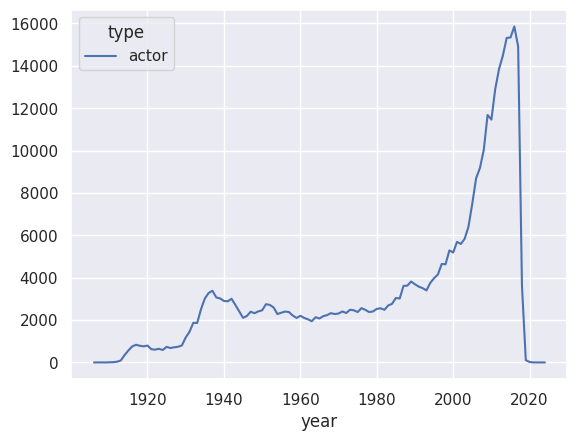

In [ ]:
cast.groupby(['year','type']).size().unstack().plot()

Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot

<Axes: xlabel='year'>

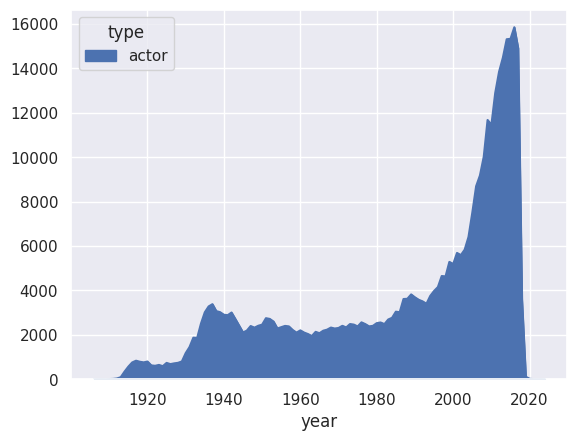

In [ ]:
cast.groupby(['year','type']).size().unstack().plot(kind='area')

Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

<Axes: xlabel='year'>

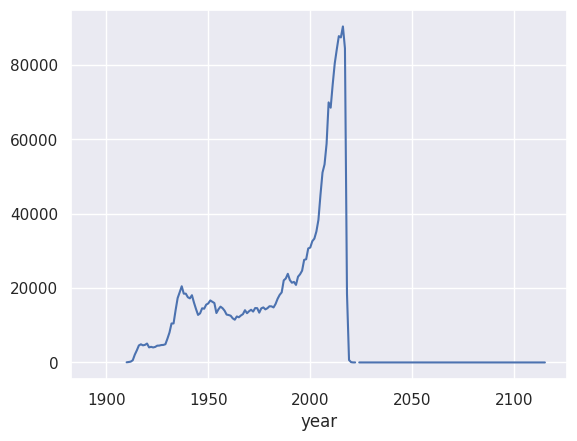

In [17]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor - c.actress).plot()

Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

<Axes: xlabel='year'>

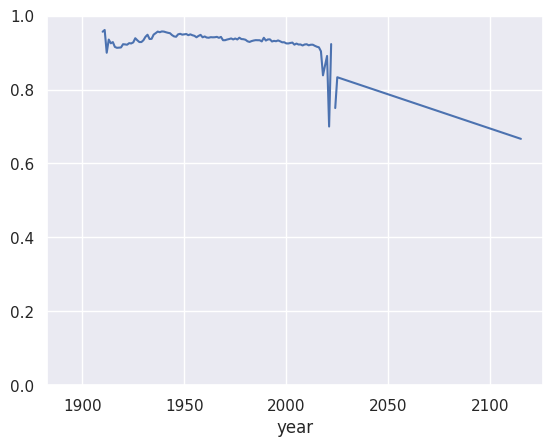

In [18]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])



Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

<Axes: xlabel='year'>

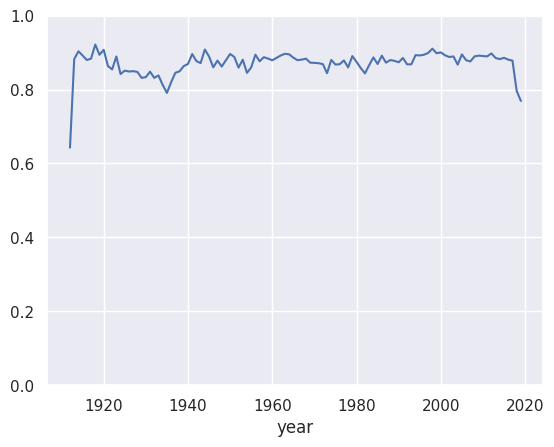

In [19]:
# Plot the fraction of supporting (n=2) roles
# that have been 'actor' roles
# each year in the history of film.

c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

<Axes: xlabel='year'>

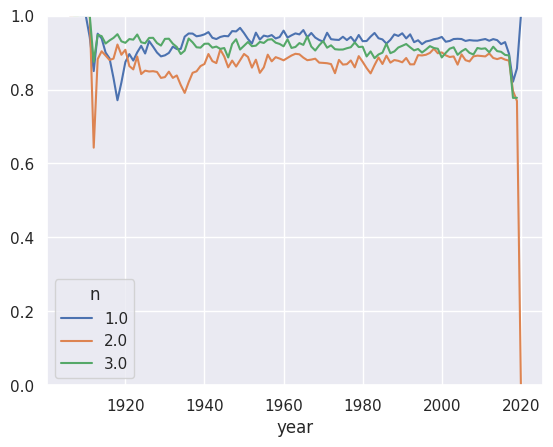

In [20]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type').fillna(0)
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])